# COMP90051 Project 2
**Name:** *Kechen Zhao*

**Student ID:** *957398*

In [2]:
# You can add additional imports here
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from collections import defaultdict

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import math
from sklearn.cluster import AgglomerativeClustering
import itertools
from scipy.cluster.hierarchy import ward, fcluster, leaders, fclusterdata
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 0. Loading the dataset

In [4]:
# do not edit this cell
# load the data files (download from the LMS)
embedded_images = np.load('images.npy')
labels = np.load('labels.npy')

# split into pool & testing
X_pool, X_test, y_pool, y_test = train_test_split(embedded_images, labels, 
                                                  test_size=0.5, random_state=1234, shuffle=True)

# sample a seed set
np.random.seed(1234)
label2id = defaultdict(list)
for i, label in enumerate(y_pool):
    label2id[label].append(i)
seed_set = []
for label, ids in label2id.items():
    seed_set.extend(np.random.choice(ids, size=10, replace=False))

## 1. Applying logistic regression

In [5]:
#def train_logistic_regression(X, y, **args):
def train_logistic_regression(X, y, penalty, tol, C, max_iter, solver):
    """
    Train a logistic regression model on dataset (X, y) and return trained model.
    X: matrix of real values, size n x d
    y: vector of string labels, size n
    args: optional arguments e.g., for hyper-parameters
    """
    # your code here
    
    model = LogisticRegression(penalty='none',tol = tol, C = C, multi_class='multinomial', solver=solver, max_iter = max_iter)
    model.fit(X, y)

    return model

    pass

In [6]:
def evaluate_logistic_regression_accuracy(Xt, yt, model):
    """
    Apply logistic regression prediction on dataset Xt and evaluate accuracy against yt,
    returing the accuracy results as a scalar.
    Xt: matrix of real values, size m x d
    yt: vector of string labels, size m
    """
    # your code here
    
    logmod = model
    #logmod.fit(Xt, yt)
    y_pred = logmod.predict(Xt)
    scores = metrics.accuracy_score(yt, y_pred)
    
    return scores

    pass

In [1357]:
# your code here for training, evaluating & plotting results

In [7]:
# hyper-parameter setup
penalty = 'none'
tol = 0.0001
C = 1.0

Accuracy trained based on seed set: 0.32354771784232367
Accuracy trained based on seed set: 0.3224066390041494
Accuracy trained based on seed set: 0.31742738589211617
Accuracy trained based on seed set: 0.3176348547717842
Accuracy trained based on seed set: 0.3220954356846473
Accuracy trained based on seed set: 0.3200207468879668
Accuracy trained based on seed set: 0.3172199170124481
Accuracy trained based on seed set: 0.3244813278008299
Accuracy trained based on seed set: 0.3220954356846473
Accuracy trained based on seed set: 0.3219917012448133
Accuracy trained based on seed set: 0.31908713692946056
Accuracy trained based on seed set: 0.3233402489626556
Accuracy trained based on seed set: 0.3203319502074689
Accuracy trained based on seed set: 0.32136929460580915
Accuracy trained based on seed set: 0.3216804979253112
Accuracy trained based on seed set: 0.32053941908713696
Accuracy trained based on seed set: 0.31939834024896263


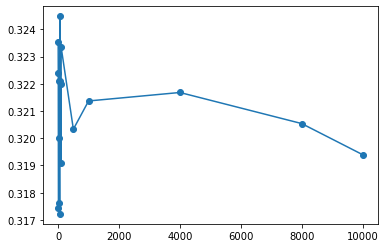

In [1359]:
# find the suitable number of iterations
iter_list = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000, 4000, 8000, 10000]

iter_accuracy = []
for num in iter_list:
    model = train_logistic_regression(seed_X, np.array(seed_y), penalty, tol, C, max_iter, 'sag')
    accuracy = evaluate_logistic_regression_accuracy(X_test, y_test, model)
    print("Accuracy trained based on seed set:", accuracy)
    iter_accuracy.append(accuracy)
    
# plot accuracy score by seed set
plt.plot(iter_list, iter_accuracy, 'o-')
plt.show()

The accuracies of models are quite stable under different number of iterations, so we choose iteration = 10 in order to shorten the running time.

In [1360]:
max_iter = 10

In [1361]:
# seed set
seed_X = []
seed_y = []
for index in seed_set:
    seed_X.append(X_pool[index])
    seed_y.append(y_pool[index])

In [1362]:
# test for different solvers

# Hyper-parameters set up
solver_list = ['lbfgs', 'sag', 'saga', 'newton-cg']

accuracy_seed_solver = []
accuracy_pool_solver = []
for solver in solver_list:
    model_seed = train_logistic_regression(seed_X, seed_y, penalty, tol, C, max_iter, solver)
    seed_score = evaluate_logistic_regression_accuracy(X_test, y_test, model_seed)
    accuracy_seed_solver.append(seed_score)
    print(f"Accuracy trained based on seed set by solver {solver}:", seed_score)
    model_pool = train_logistic_regression(X_pool, y_pool, penalty, tol, C, max_iter, solver)
    pool_score = evaluate_logistic_regression_accuracy(X_test, y_test, model_pool)
    accuracy_pool_solver.append(pool_score)
    print(f"Accuracy trained based on pool set by solver {solver}:", pool_score)

Accuracy trained based on seed set by solver lbfgs: 0.27551867219917014
Accuracy trained based on pool set by solver lbfgs: 0.34854771784232363
Accuracy trained based on seed set by solver sag: 0.3200207468879668
Accuracy trained based on pool set by solver sag: 0.566908713692946
Accuracy trained based on seed set by solver saga: 0.3163900414937759
Accuracy trained based on pool set by solver saga: 0.5477178423236515
Accuracy trained based on seed set by solver newton-cg: 0.31483402489626555
Accuracy trained based on pool set by solver newton-cg: 0.5935684647302905


[0.27551867219917014, 0.3200207468879668, 0.3163900414937759, 0.31483402489626555]


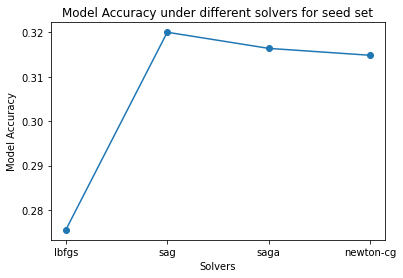

In [1363]:
# plot accuracy score by seed set
print(accuracy_seed_solver)
plt.plot(solver_list, accuracy_seed_solver, 'o-')
plt.title("Model Accuracy under different solvers for seed set")
plt.xlabel("Solvers")
plt.ylabel("Model Accuracy")
plt.show()

[0.34854771784232363, 0.566908713692946, 0.5477178423236515, 0.5935684647302905]


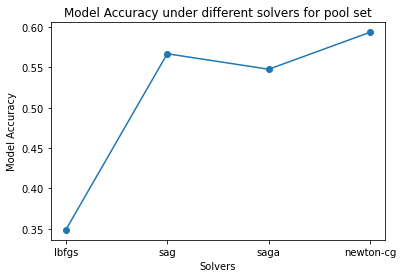

In [1364]:
# plot accuracy score by pool set
print(accuracy_pool_solver)
plt.plot(solver_list, accuracy_pool_solver, 'o-')
plt.title("Model Accuracy under different solvers for pool set")
plt.xlabel("Solvers")
plt.ylabel("Model Accuracy")
plt.show()

In [1365]:
# choose sag as the solver since it has high accuracy and also more better runtime efficiency compare to newton-cg
solver = 'sag'

In [932]:
model = SGDClassifier(loss='log')
model.fit(X_pool, y_pool)
y_pred = model.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)
# also tried SGDClassifier(loss='log'), but it has lower accuracy score, so not consider

0.5224066390041494


## 2. Active learning framework with Random selection

In [8]:
def random_select(X, model, **args):
    """
    Given an unlabelled dataset X, a matrix of n x d, and a model (not used)
    returns a vector of scores of length n. Each entry reflects the priority 
    of the corresponding instance. Higher means better.
    
    """
    # fill in
    n = len(X)
    randnums = np.random.random((n,1))
    
    return list(randnums)
    pass

In [50]:
# modified version for query committee

def pool_based_active_learning(X_pool, y_pool, seed_ids,
                               train_func, select_func,
                               max_size, batch_size, select_method, query_method, **args):
    """
    Perform an active learning simulation, which starts by training on a seed set,
    then iteratively applies the selection function to rank instances in the pool,
    selects the top few instances which are included into the training set and the
    process repeats. 
        X_pool: matrix of n x d
        y_pool: vector of string labels, size n
        seed_ids: initial labelled set set, as a list of indices [0..n-1] into pool
        train_func: function which given (X, y, optional args) returns a trained model
        select_func: function which given (X, optional args) returns a sequence of scores
        max_size: stopping condition for active learning, when labelled data reaches given size
        batch_size: number of instances to be labelled in each iteration
        args: optional arguments passed to training and selection function
    returns the sequence of trained models 
    """
  
    accuracy_record = []
    
    # construct U, the pool of unlabelled instances and their hidden labels
    U_X = []
    U_y = []
    # construct L, the set of initial labelled instances
    L_X = []
    L_y = []
    
    for index in range(len(X_pool)):
        if index not in seed_ids:
            U_X.append(X_pool[index])
            U_y.append(y_pool[index])
        else:
            L_X.append(X_pool[index])
            L_y.append(y_pool[index])
#     L_X = pd.DataFrame(L_X)
#     L_y = pd.DataFrame(L_y).loc[:,0]

    
    b = batch_size
    T = int(max_size/batch_size)
    
    
    for t in range(0, T):
        # selection method
        if select_method == "query_by_committee":
            ensemble1, ensemble2, logmod = train_committee(np.array(L_X), np.array(L_y), 'none', 0.0001, 1.0, 10, 'sag')
            theta_t = logmod
            if query_method == "vote_entropy":
                model = [ensemble1, ensemble2]
                labels = set(y_pool)
                r = select_func(U_X, model, labels)
            else:
                model = [ensemble1, ensemble2]
                r = select_func(U_X, model)
        else:
            theta_t = train_func(np.array(L_X), np.array(L_y), 'none', 0.0001, 1.0, 10, 'sag')
            r = select_func(U_X, theta_t) # random_select
            
        # find the indices of top b instances in r
        max_index = []
        for i in range(b):
            max_index.append(r.index(max(r)))
            r[r.index(max(r))] = 0

        for j in max_index:
            x_j = U_X[j]
            L_X.append(np.array(x_j))
            U_X[j] = []
            y_j = U_y[j]
            L_y.append(np.array(y_j))
            U_y[j] = np.nan

        U_X = list(np.array(pd.DataFrame(U_X).dropna()))
        U_y = list(pd.DataFrame(U_y).dropna().loc[:,0])
        
        # record the accuracy of model after each iteration
        size  = int ((t+1)*b)
        score = evaluate_logistic_regression_accuracy(X_test, y_test, theta_t)
        accuracy_record.append(score)
        print(f"Accuracy trained based on number of instances = {size+300}:", score)
        
    return theta_t, accuracy_record
    pass

In [51]:
# random_select accuracy
max_size = 2700
batch = 60
models_random, accuracy_randomSelection = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                    train_logistic_regression, random_select, 
                                    max_size, batch, "random_select", "none")

Accuracy trained based on number of instances = 360: 0.3225103734439834
Accuracy trained based on number of instances = 420: 0.34107883817427387
Accuracy trained based on number of instances = 480: 0.3412863070539419
Accuracy trained based on number of instances = 540: 0.35466804979253114
Accuracy trained based on number of instances = 600: 0.36649377593360993
Accuracy trained based on number of instances = 660: 0.37344398340248963
Accuracy trained based on number of instances = 720: 0.3806016597510373
Accuracy trained based on number of instances = 780: 0.38931535269709544
Accuracy trained based on number of instances = 840: 0.38973029045643154
Accuracy trained based on number of instances = 900: 0.3942946058091286
Accuracy trained based on number of instances = 960: 0.3955394190871369
Accuracy trained based on number of instances = 1020: 0.404045643153527
Accuracy trained based on number of instances = 1080: 0.40612033195020747
Accuracy trained based on number of instances = 1140: 0.

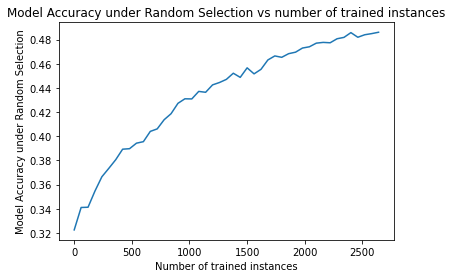

In [52]:
# plot accuracy score by size_list
size_list = [i for i in range(0, 2700, 60)]
plt.plot(size_list, accuracy_randomSelection, '-')
plt.title("Model Accuracy under Random Selection vs number of trained instances")
plt.xlabel("Number of trained instances")
plt.ylabel("Model Accuracy under Random Selection")
plt.show()

## 3. Uncertainty sampling

In [53]:
def logistic_regression_entropy_select(X, model, **args):
    """
    Given an unlabelled dataset X, a matrix of n x d, and a discriminative model 
    P(y|x), returns a vector of n entropy values.
    
    Should use intercept and coefficients from logistic regression to calculate the probability
    for each class y we have the corresponding intercept and coefficients
    
    X will be served as Data Frame
    
    """
    # fill in

    log_matrix = model.predict_proba(pd.DataFrame(X))
    entropy = list(pd.DataFrame(-log_matrix*np.log(log_matrix)).sum(axis=1))
        
    return entropy
        
    
    pass

In [54]:
# entropy_select accuracy
max_size = 2700
batch = 60
models_us, accuracy_us = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                 train_logistic_regression, 
                                 logistic_regression_entropy_select, 
                                 max_size, batch, "entropy_select", "none")

Accuracy trained based on number of instances = 360: 0.3200207468879668
Accuracy trained based on number of instances = 420: 0.3354771784232365
Accuracy trained based on number of instances = 480: 0.3411825726141079
Accuracy trained based on number of instances = 540: 0.36358921161825725
Accuracy trained based on number of instances = 600: 0.3677385892116183
Accuracy trained based on number of instances = 660: 0.38029045643153525
Accuracy trained based on number of instances = 720: 0.3866182572614108
Accuracy trained based on number of instances = 780: 0.3899377593360996
Accuracy trained based on number of instances = 840: 0.3862033195020747
Accuracy trained based on number of instances = 900: 0.4024896265560166
Accuracy trained based on number of instances = 960: 0.4032157676348548
Accuracy trained based on number of instances = 1020: 0.40860995850622406
Accuracy trained based on number of instances = 1080: 0.4137966804979253
Accuracy trained based on number of instances = 1140: 0.420

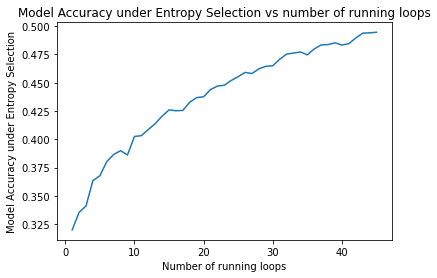

In [69]:
# plot accuracy score by size_list
size_list = [i for i in range(0, 2700, 60)]
run_list = [int(size/60)+1 for size in size_list]
plt.plot(run_list, accuracy_us, '-')
plt.title("Model Accuracy under Entropy Selection vs number of running loops")
plt.xlabel("Number of running loops")
plt.ylabel("Model Accuracy under Entropy Selection")
plt.show()

## 4. Query by committee

In [56]:
# don't forget to provide function descriptive comments, like those provided in templates above

In [57]:
def query_by_committee_vote_entropy(X, model, labels, **args):
    
    """
    Given an unlabelled dataset X, a matrix of n x d, and a discriminative model 
    P(y|x), returns a vector of n vote entropy values.
    
    C = number of models
    
    Need to use C number of models to predict instances in X.
    Then for different classes of y, calculate the vote and sum them up.
    Assume argument model contains two models. 
    
    Arugment 'labels': a list of unique possible labels
    
    """
    
    X = pd.DataFrame(X)
    vote_entropy = []
    
    # get members in committee
    model1 = model[0]
    model2 = model[1]
    
    # use models to make predictions on the unlabelled dataset X
    classification1 = model1.predict(X)
    classification2 = model2.predict(X)

    # loop over each instances in X, calculate their corresponding vote entropy
    for i in range(len(X)):
        
        # create a dictionary to track the vote
        dic = dict.fromkeys(labels, 0)
        
        predic1 = classification1[i]
        predic2 = classification2[i]
        
        
        dic[predic1] = dic[predic1] + 1
        dic[predic2] = dic[predic2] + 1
        
        entropy = 0
        for vote in dic.values():
            if vote != 0:
                entropy = entropy + (vote/2)*np.log(vote/2)
            
        vote_entropy.append(-entropy)
        
    return vote_entropy

    pass


In [58]:
def query_by_committee_soft_vote_entropy(X, model, **args):
    
    """
    Given an unlabelled dataset X, a matrix of n x d, and a discriminative model 
    P(y|x), returns a vector of n soft vote entropy values.
    
    Argument model contains two sets of parameters (intercept, coefficient) of 2 different models
    
    C = 2: number of committee
    
    """

    svm = model[0]
    logmod = model[1]
    
    svm_matrix = svm.predict_proba(pd.DataFrame(X))
    log_matrix = logmod.predict_proba(pd.DataFrame(X))
    soft_vote_entropy = list(pd.DataFrame(-((log_matrix+svm_matrix)/2)*np.log((log_matrix+svm_matrix)/2)).sum(axis=1))
    
    return soft_vote_entropy
    
    pass


In [59]:
def query_by_committee_KL(X, model, **args):
    
    """
    Given an unlabelled dataset X, a matrix of n x d, and a discriminative model 
    P(y|x), returns a vector of n soft vote entropy values.
    
    Argument model contains 2 different models
    
    C = 2: number of committee
    
    """
    
    X = pd.DataFrame(X)
    
    svm = model[0]
    logmod = model[1]
    
    svm_matrix = svm.predict_proba(pd.DataFrame(X))
    log_matrix = logmod.predict_proba(pd.DataFrame(X))
    
    KL_divergence_svm = pd.DataFrame(svm_matrix*np.log(svm_matrix/((log_matrix+svm_matrix)/2))).sum(axis=1)
    KL_divergence_log = pd.DataFrame(log_matrix*np.log(log_matrix/((log_matrix+svm_matrix)/2))).sum(axis=1)
    KL_divergence = list(np.array(KL_divergence_svm)+np.array(KL_divergence_log)/2)

    return KL_divergence

    pass

In [60]:
## train_committee: learn 2 models to form the committee
## use the committee to do data selection based on the above 3 methods
## use the selected data to evaluate the accuracy of logistic regression

In [61]:
def train_committee(X, y, penalty, tol, C, max_iter, solver):
    
    """
    Train a logistic regression model on dataset (X, y) and return trained model.
    X: matrix of real values, size n x d
    y: vector of string labels, size n
    Could return two models:
    – the ensemble and the standard logistic regression model as a tuple 
    i.e., return (model1, model2)
    """

    ensemble1 = svm.SVC(probability=True, max_iter=200)
    ensemble1.fit(X,y)
    
    ensemble2 = LogisticRegression(multi_class='multinomial', max_iter = 10, solver='saga')
    ensemble2.fit(X,y)
        
    logmod = LogisticRegression(penalty='none',tol = tol, C = C, multi_class='multinomial', solver=solver, max_iter = max_iter)
    logmod.fit(X,y)
    
    return (ensemble1, ensemble2, logmod)

    pass

In [62]:
## your code here for training, evaluation, and plotting code

In [63]:
size_list = [i for i in range(0, 2700, 60)]
run_list = [int(size/60)+1 for size in size_list]

In [64]:
# vote_entropy
max_size = 2700
batch = 60
models_us, accuracy_vote_entropy = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                     train_committee, 
                                     query_by_committee_vote_entropy, 
                                     max_size, batch, "query_by_committee", "vote_entropy")

Accuracy trained based on number of instances = 360: 0.3240663900414938
Accuracy trained based on number of instances = 420: 0.33755186721991703
Accuracy trained based on number of instances = 480: 0.3523858921161826
Accuracy trained based on number of instances = 540: 0.3685684647302905
Accuracy trained based on number of instances = 600: 0.3698132780082988
Accuracy trained based on number of instances = 660: 0.3860995850622407
Accuracy trained based on number of instances = 720: 0.3877593360995851
Accuracy trained based on number of instances = 780: 0.39927385892116185
Accuracy trained based on number of instances = 840: 0.4059128630705394
Accuracy trained based on number of instances = 900: 0.4067427385892116
Accuracy trained based on number of instances = 960: 0.41431535269709546
Accuracy trained based on number of instances = 1020: 0.4190871369294606
Accuracy trained based on number of instances = 1080: 0.42365145228215767
Accuracy trained based on number of instances = 1140: 0.42

In [65]:
# soft_vote_entropy
max_size = 2700
batch = 60
models_us, accuracy_soft_vote_entropy = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                     train_committee, 
                                     query_by_committee_soft_vote_entropy, 
                                     max_size, batch, "query_by_committee", "soft_vote_entropy")

Accuracy trained based on number of instances = 360: 0.3179460580912863
Accuracy trained based on number of instances = 420: 0.33807053941908716
Accuracy trained based on number of instances = 480: 0.3476141078838174
Accuracy trained based on number of instances = 540: 0.36804979253112036
Accuracy trained based on number of instances = 600: 0.37230290456431536
Accuracy trained based on number of instances = 660: 0.3796680497925311
Accuracy trained based on number of instances = 720: 0.3821576763485477
Accuracy trained based on number of instances = 780: 0.391597510373444
Accuracy trained based on number of instances = 840: 0.39699170124481326
Accuracy trained based on number of instances = 900: 0.4024896265560166
Accuracy trained based on number of instances = 960: 0.4046680497925311
Accuracy trained based on number of instances = 1020: 0.4062240663900415
Accuracy trained based on number of instances = 1080: 0.41514522821576766
Accuracy trained based on number of instances = 1140: 0.41

In [66]:
# KL test
max_size = 2700
batch = 60
models_us, accuracy_KL = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                     train_committee, 
                                     query_by_committee_KL, 
                                     max_size, batch, "query_by_committee", "KL")

Accuracy trained based on number of instances = 360: 0.3192946058091286
Accuracy trained based on number of instances = 420: 0.3266597510373444
Accuracy trained based on number of instances = 480: 0.3216804979253112
Accuracy trained based on number of instances = 540: 0.33236514522821575
Accuracy trained based on number of instances = 600: 0.3369294605809129
Accuracy trained based on number of instances = 660: 0.3440871369294606
Accuracy trained based on number of instances = 720: 0.3471991701244813
Accuracy trained based on number of instances = 780: 0.3592323651452282
Accuracy trained based on number of instances = 840: 0.36182572614107883
Accuracy trained based on number of instances = 900: 0.3646265560165975
Accuracy trained based on number of instances = 960: 0.374896265560166
Accuracy trained based on number of instances = 1020: 0.3771784232365145
Accuracy trained based on number of instances = 1080: 0.3767634854771784
Accuracy trained based on number of instances = 1140: 0.38786

In [67]:
size_list = [i for i in range(0, 2700, 60)]
run_list = [int(size/60)+1 for size in size_list]

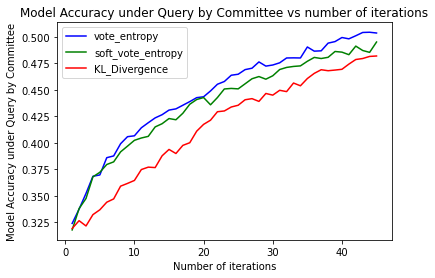

In [70]:
plt.plot(run_list, accuracy_vote_entropy, 'b-', label = "vote_entropy")
plt.plot(run_list, accuracy_soft_vote_entropy, 'g-', label = "soft_vote_entropy")
plt.plot(run_list, accuracy_KL, 'r-', label = "KL_Divergence")
plt.title("Model Accuracy under Query by Committee vs number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Model Accuracy under Query by Committee")
plt.legend()
plt.show()

## 5. Hierarchical sampling

In [1381]:
# do a sample hierarchical clustering on seed set
clustering = AgglomerativeClustering(n_clusters=30).fit(seed_X)
clustering.labels_

array([29, 19, 15,  1, 16, 25,  5,  1,  1,  1, 16, 28, 19, 12, 16, 13, 17,
       17, 11,  8,  5,  1,  9,  2, 19, 29, 24,  8,  6, 22,  1, 13,  0, 13,
       13, 22, 22,  1,  1, 13, 17, 17,  2,  8,  5, 29,  5,  5,  8,  8,  2,
       10, 10,  6, 14, 10,  1, 10, 10, 17, 29, 16, 26,  2, 28, 15,  7,  5,
       28, 29, 11,  4,  4,  4,  4,  4,  4,  4, 11, 11, 14, 29,  7,  8, 17,
       13,  9, 10,  5, 10,  3, 24,  3,  0, 18, 24, 10, 10,  3, 26, 14, 24,
        6,  6,  0,  0,  6, 19,  0, 26,  0,  3,  0,  3, 26, 22, 24, 14,  0,
        0,  6,  6,  8, 24, 27,  9, 18, 27,  3,  6, 13,  9, 26, 26, 15, 25,
       15, 13, 28, 28,  3, 25,  1, 27,  1, 12, 24, 24,  9, 29, 20, 20, 27,
       24, 12, 20, 20, 20, 21,  1, 16,  5,  2, 16, 13, 18,  2,  0, 16,  2,
        0,  9,  1,  2,  2,  1, 29,  1,  6, 22,  3, 29,  3,  8, 13,  0, 27,
        9, 29,  3,  0, 17,  9, 27, 17,  0, 12, 12, 11,  2,  7, 19,  7,  3,
       25, 24, 27,  7, 20,  7,  7, 11,  7, 21, 21, 21, 21, 21, 21, 18,  2,
       15, 19,  2, 15, 15

In [1304]:
# construct a sample tree for hierarchical clustering, which will be useful for the hierarchical_clustering function
ii = itertools.count(len(seed_X))
tree = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in clustering.children_]

In [1384]:
tree

[{'node_id': 300, 'left': 75, 'right': 77},
 {'node_id': 301, 'left': 72, 'right': 300},
 {'node_id': 302, 'left': 151, 'right': 156},
 {'node_id': 303, 'left': 34, 'right': 39},
 {'node_id': 304, 'left': 6, 'right': 46},
 {'node_id': 305, 'left': 221, 'right': 224},
 {'node_id': 306, 'left': 243, 'right': 248},
 {'node_id': 307, 'left': 28, 'right': 102},
 {'node_id': 308, 'left': 21, 'right': 271},
 {'node_id': 309, 'left': 208, 'right': 235},
 {'node_id': 310, 'left': 108, 'right': 231},
 {'node_id': 311, 'left': 64, 'right': 138},
 {'node_id': 312, 'left': 155, 'right': 302},
 {'node_id': 313, 'left': 71, 'right': 301},
 {'node_id': 314, 'left': 116, 'right': 146},
 {'node_id': 315, 'left': 20, 'right': 88},
 {'node_id': 316, 'left': 130, 'right': 137},
 {'node_id': 317, 'left': 220, 'right': 227},
 {'node_id': 318, 'left': 27, 'right': 49},
 {'node_id': 319, 'left': 101, 'right': 259},
 {'node_id': 320, 'left': 214, 'right': 218},
 {'node_id': 321, 'left': 176, 'right': 181},
 {'n

First, try different hierarchical clustering methods to select the most suitable one.

In [1306]:
# construct U, the pool of unlabelled instances and their hidden labels
U_X = []
U_y = []
# construct L, the set of initial labelled instances
L_X = []
L_y = []
for index in range(len(X_pool)):
    if index not in seed_set:
        U_X.append(X_pool[index])
        U_y.append(y_pool[index])
    else:
        L_X.append(X_pool[index])
        L_y.append(y_pool[index])

<Figure size 432x288 with 0 Axes>

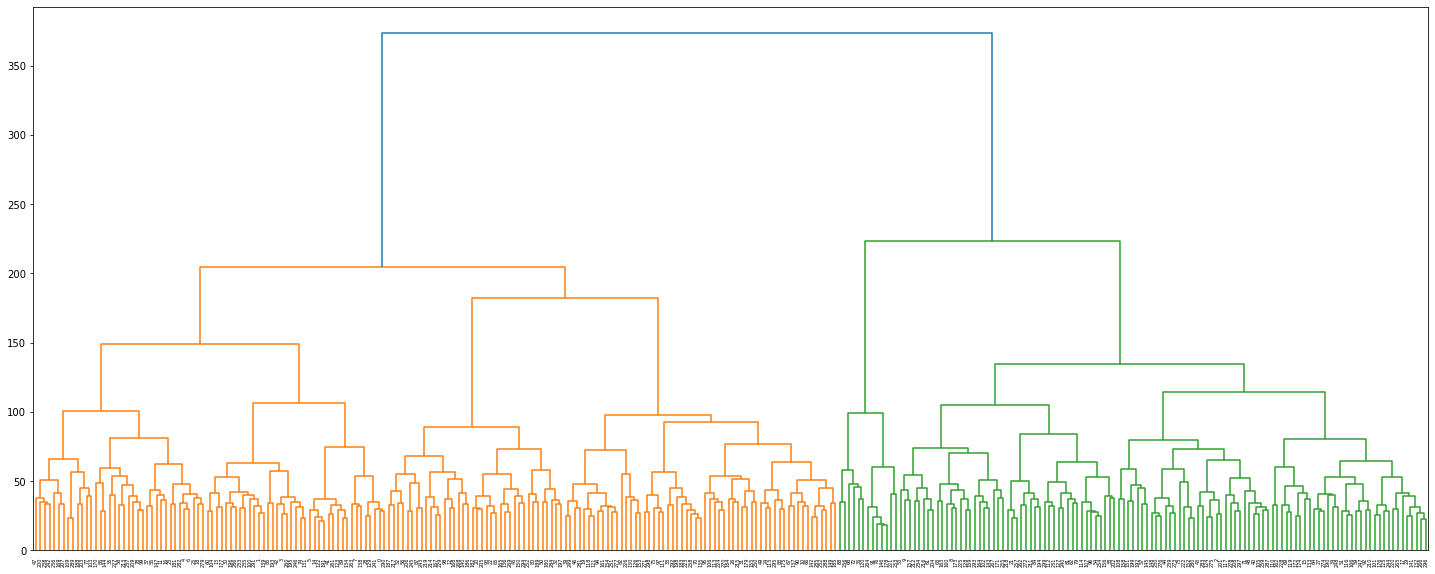

In [1308]:
Z = linkage(L_X, 'ward')
plt.figure()
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)

<Figure size 432x288 with 0 Axes>

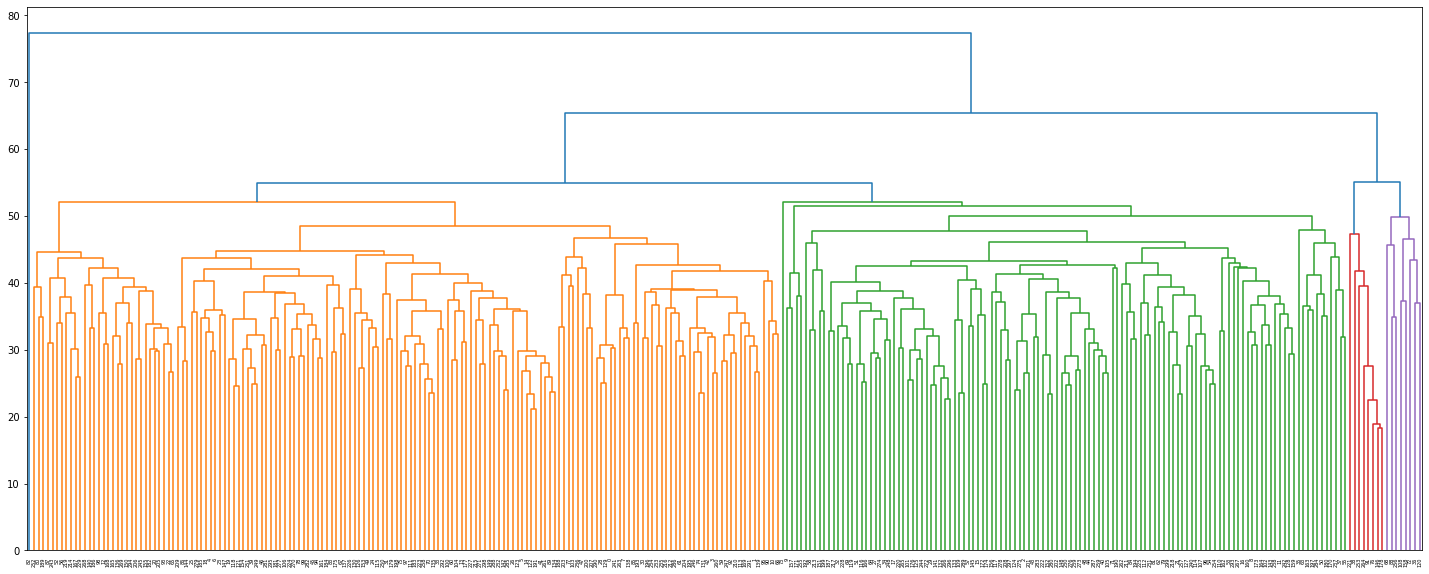

In [1309]:
Z = linkage(L_X, 'average')
plt.figure()
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)

<Figure size 432x288 with 0 Axes>

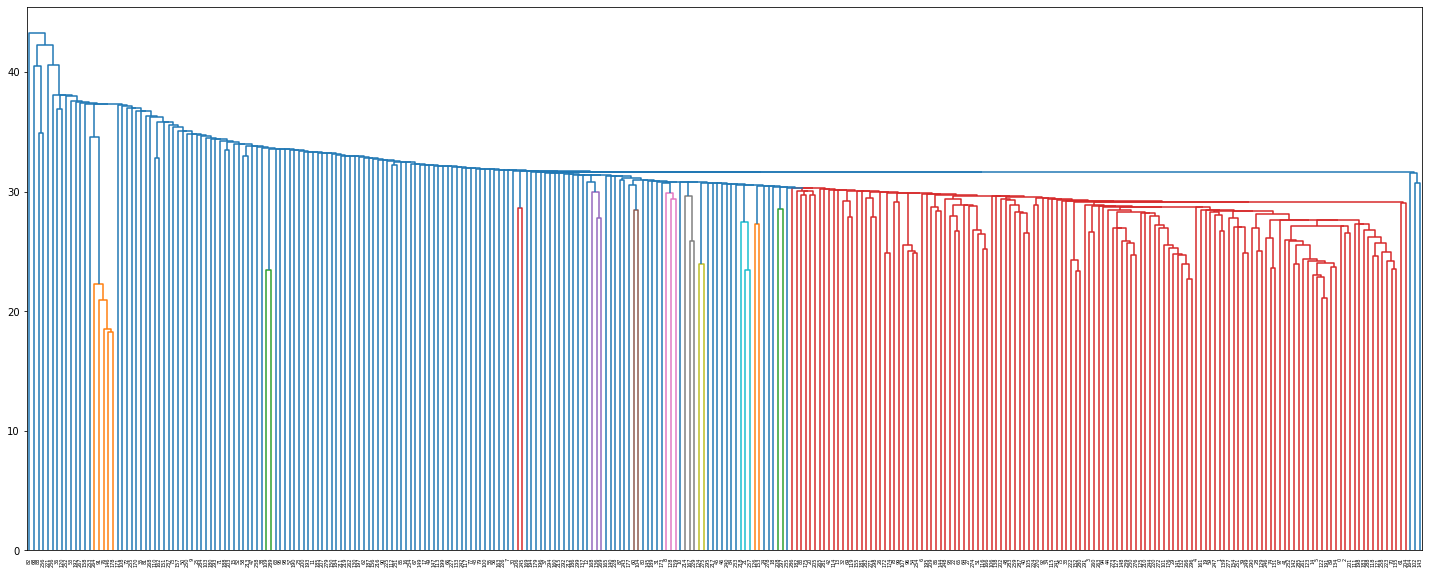

In [1310]:
Z = linkage(L_X, 'single')
plt.figure()
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)

Using Ward variance minimization algorithm gives the most sensible hierarchical clustering, so I will continuous to use this algorithm to do hierarchical clustering in the following functions.

In [1312]:
def hierarchical_sampling(X_pool, seed_set, batch_size, max_size, select):
    
    # clusters: Hierarchical clustering of unlabelled points = X_pool - seed_X
    # select: controls the selective sampling
    
    # Z = ward(pdist(seed_X)) # linkage matrix of data
    # T = fcluster(Z, 30, criterion='distance') cluster
    
    
    # construct U, the pool of unlabelled instances and their hidden labels
    U_X = []
    U_y = []
    # construct L, the set of initial labelled instances
    L_X = []
    L_y = []
    for index in range(len(X_pool)):
        if index not in seed_set:
            U_X.append(X_pool[index])
            U_y.append(y_pool[index])
        else:
            L_X.append(X_pool[index])
            L_y.append(y_pool[index])

    # perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward').fit(L_X)
    # construct the tree
    ii = itertools.count(len(seed_X))
    tree = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in clustering.children_]
    root = tree[-1]
    P = [root] # current pruning of tree
    
    b = batch_size
    T = int(max_size/batch_size)
    
    for t in range(0, T):
        for i in range(batch_size):
            
            # select 
            node_id = select_node(P) # select a node from pruning
            r = select_instance(get_instance(node_id, tree)) 
            j = r.index(max(r)) 
            
            # query the label
            x_j = U_X[j]
            L_X.append(np.array(x_j))
            U_X.pop(j)
            y_j = U_y[j]
            L_y.append(np.array(y_j))
            U_y.pop(j)
            
            # assume a dictionary called cluster_dict is constructed for each node with the following structures:
            # {"node_id":int, "label1":int, "label2":int, ..., "label30": int, "total":int}
            
            # update the counts and probabilities
            cluster_dict["node_id"==node_id]["y_j"] += 1 
            cluster_dict["node_id"==node_id]["total"] += 1 
            for node in find_descendent(node_id, tree):
                cluster_dict["node_id"==node]["total"] += 1
            
    pass

In [ ]:
# pick a point z from a set of instances
def select_instance(X):
    pass

In [ ]:
# a helper function which find the set of unlabelled instances of a given node in the given tree
def get_instance(node_id, tree):
    pass

In [ ]:
# select a node from pruning of tree
def select_node(P):
    pass

In [ ]:
# return a list descendent nodes of a given node_id
def find_descendent(node_id, tree):
    pass

The above hierarchical_sampling function is not completed implemented, since I don't havs any ideas about how to find the data instances within a node (cluster). Without that, any scores or probabilities are impossible to compute (sad face). 